# Exact Algorithms

The obvious advantage of such algorithms is the guarantee that the output is optimal. However, with the TSP being classified NP-hard, it seems that all exact algorithms must have superpolynomial time complexity. This is certainly true of the algorithms demonstrated below. This notebook may take a couple of minutes to execute all cells.

In [10]:
from Req import brute_tour, held_karp, gen_ran, Hamiltonian
from GraphTheory.tspt import tspfull
from time import time
import matplotlib.pyplot as plt

We start by creating a list of randomly generated maps to use in our investigation.

In [4]:
maps = [gen_ran(i) for i in range(3, 20)]

## Brute Force Search

We investigate how fast the CPU time of finding a brute force optimal solution increases with the size of the problem. With factorial time complexity, things rapidly get out of hand.

Time elapsed: 0.0 seconds


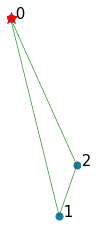

Time elapsed: 0.0 seconds


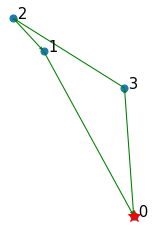

Time elapsed: 0.0 seconds


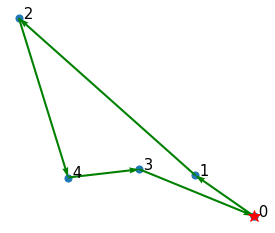

Time elapsed: 0.002 seconds


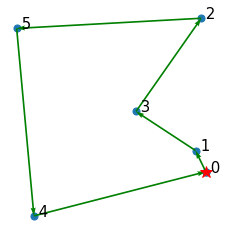

Time elapsed: 0.01 seconds


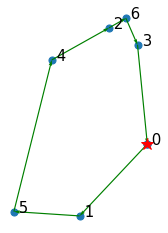

Time elapsed: 0.067 seconds


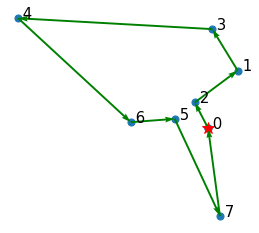

Time elapsed: 0.823 seconds


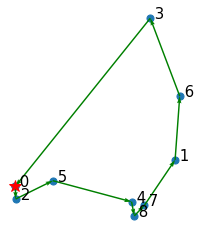

Time elapsed: 6.901 seconds


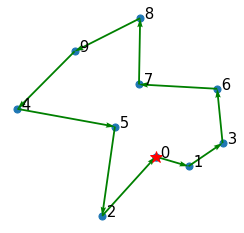

Time elapsed: 76.32 seconds


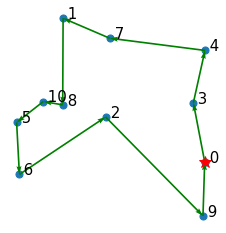

In [5]:
bf_times = []
for map in maps[:9]:
    t0 = time()
    dummy = brute_tour(map)
    t1 = time()
    t = t1 - t0
    bf_times.append(t)
    print(f"Time elapsed: {round(t, 3)} seconds")
    dummy.show2d()

## Dynamic Programming

The Held-Karp algorithm utilises memoisation to rule out sub-optimal tours, making it more efficient than brute force. This leads to an improved but still terrible time complexity of $O(n^{2}2^{n})$.

Time elapsed: 0.0 seconds


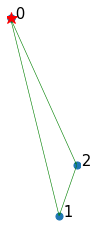

Time elapsed: 0.0 seconds


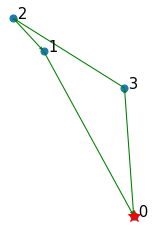

Time elapsed: 0.0 seconds


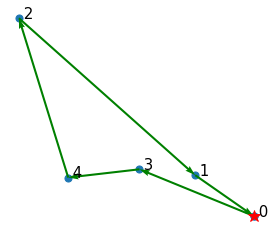

Time elapsed: 0.003 seconds


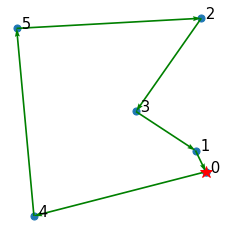

Time elapsed: 0.007 seconds


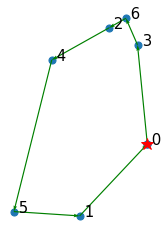

Time elapsed: 0.011 seconds


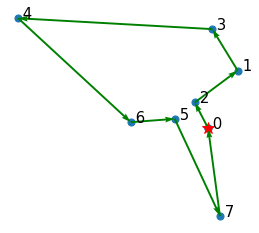

Time elapsed: 0.05 seconds


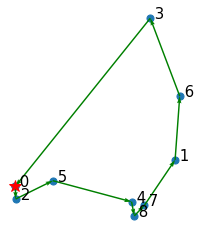

Time elapsed: 0.117 seconds


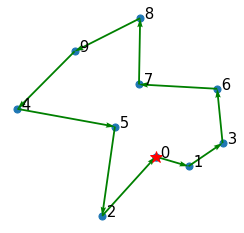

Time elapsed: 0.253 seconds


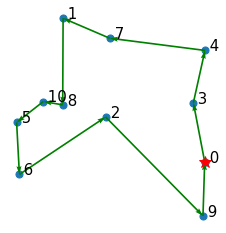

Time elapsed: 0.557 seconds


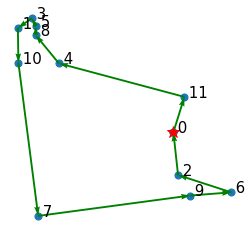

Time elapsed: 1.516 seconds


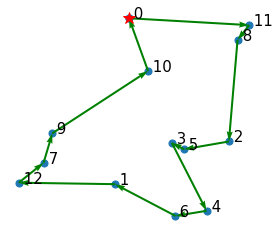

Time elapsed: 3.105 seconds


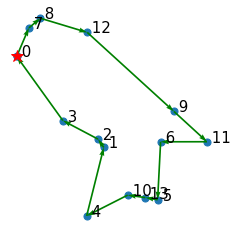

Time elapsed: 6.907 seconds


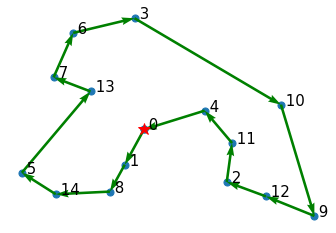

Time elapsed: 17.403 seconds


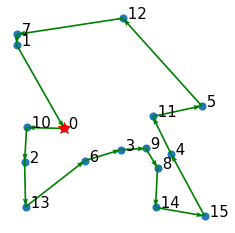

Time elapsed: 46.641 seconds


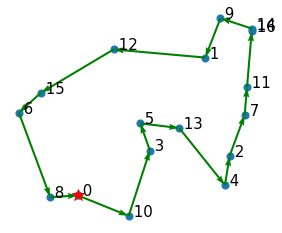

In [6]:
hk_times = []
for map in maps[:15]:
    t0 = time()
    dummy = held_karp(map)
    t1 = time()
    t = t1 - t0
    hk_times.append(t)
    print(f"Time elapsed: {round(t, 3)} seconds")
    dummy.show2d()

## Branch-and-bound

In [11]:
bb_times = []
for map in maps[:14]:
    t0 = time()
    dummy = Hamiltonian(tuple(tspfull(map.D)[0]), map)
    t1 = time()
    t = t1 - t0
    bb_times.append(t)
    print(f"Time elapsed: {round(t, 3)} seconds")
    dummy.show2d()

TypeError: '<' not supported between instances of 'Node' and 'Node'

## A Comparison

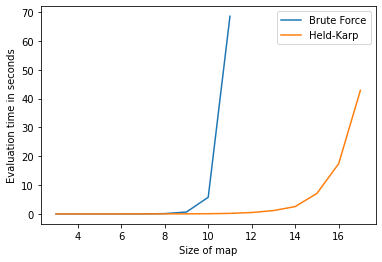

In [21]:
plt.plot([i for i in range(3, 12)], bf_times, label='Brute Force')
plt.plot([i for i in range(3, 18)], hk_times, label='Held-Karp')
plt.plot([i for i in range(3, 18)], bb_times, label='Branch-and-bound')
plt.legend()
plt.xlabel("Size of map")
plt.ylabel("Evaluation time in seconds")
plt.show()